In [139]:
import pandas as pd
import numpy as np
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt
import random
import subprocess
plt.rcParams['pdf.fonttype'] = 42

In [43]:
!mkdir -p ../doubletrouble_input ; mkdir -p ../doubletrouble_input/others ; 

Similarly to the OrthoFinder analyses, we have to do a considerable amount of prepwork to get the CDS, protein, and GFF files into a format compatible with doubletrouble so that's what we're starting with here:

In [33]:
%%bash
source ~/.bashrc
conda activate ipyrad
for i in acer_lepwrap cnat ssid dcyl; do
    cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/${i}_annotation/annotate_results/
    bioawk -c fastx '{ print $name, length($seq) }' \
        < *.proteins.fa \
        > ${i}_protein_isoform_lengths.tab
done

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [46]:
for i in ["acer_lepwrap", "cnat", "dcyl", "ssid"]:
    tmp = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/" + i + "_annotation/annotate_results/" + i + "_protein_isoform_lengths.tab", 
                sep = "\t", names = ["ISOFORM", "LENGTH"])
    tmp["GENE"] = tmp['ISOFORM'].str.split('-', 1, expand=True)[0]
    tmp = tmp.sort_values(["GENE", "LENGTH"]).reset_index(drop=True)
    tmp = tmp.drop_duplicates("GENE", keep = "last").reset_index(drop=True)
    tmp.set_index("GENE").to_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/" + i + "_annotation/annotate_results/" + i + "_protein_longest_isoform_list.tab",
                                 sep = "\t")

/tmp/ipykernel_409803/2803414877.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  tmp["GENE"] = tmp['ISOFORM'].str.split('-', 1, expand=True)[0]
/tmp/ipykernel_409803/2803414877.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  tmp["GENE"] = tmp['ISOFORM'].str.split('-', 1, expand=True)[0]
/tmp/ipykernel_409803/2803414877.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  tmp["GENE"] = tmp['ISOFORM'].str.split('-', 1, expand=True)[0]
/tmp/ipykernel_409803/2803414877.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  tmp["GENE"] = tmp['ISOFORM'].str.split('-', 1, expand=True)[0]


In [44]:
%%bash
source ~/.bashrc
conda activate base
for i in acer_lepwrap cnat ssid dcyl; do
    cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/${i}_annotation/annotate_results/
    seqtk subseq *.proteins.fa <( cut -f2 ${i}_protein_longest_isoform_list.tab ) \
        > /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/doubletrouble_input/${i}.longest-proteins.fa
    cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/doubletrouble_input/
    cut -d"-" -f1 ${i}.longest-proteins.fa > ${i}.corrected_longest-proteins.fa
done

In [66]:
%%bash
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/acer_lepwrap_annotation/annotate_results/
grep -e "^#" -e "funannotate" ./Acropora_*.gff3 \
    > /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/doubletrouble_input/acer_lepwrap.corrected_longest-proteins.gff

In [67]:
%%bash
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/cnat_annotation/annotate_results/
grep -e "^#" -e "funannotate" ./Colpophyllia_*.gff3 \
    > /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/doubletrouble_input/cnat.corrected_longest-proteins.gff

In [68]:
%%bash
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/dcyl_annotation/annotate_results/
grep -e "^#" -e "funannotate" ./Dendrogyra_*.gff3 \
    > /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/doubletrouble_input/dcyl.corrected_longest-proteins.gff

In [69]:
%%bash
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/ssid_annotation/annotate_results/
grep -e "^#" -e "funannotate" ./Siderastrea_*.gff3 \
    > /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/doubletrouble_input/ssid.corrected_longest-proteins.gff

In [50]:
!cp /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/primary_transcripts/*.faa \
    ../doubletrouble_input/others

In [25]:
%%bash
source ~/.bashrc
conda activate base
for i in cjar; do
    cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/doubletrouble_input/others
    cut -d"-" -f1 ${i}.faa > ../${i}.corrected_longest-proteins.fa
    cp ./${i}.gff ../${i}.corrected_longest-proteins.gff
done

In [ ]:
%%bash
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/doubletrouble_input/others
wget -O pmea.gff.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/942/486/045/GCA_942486045.1_PMEA_v1/GCA_942486045.1_PMEA_v1_genomic.gff.gz
wget -O pver.gff.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/030/620/025/GCF_030620025.1_CSIRO_AGI_Pver_v1/GCF_030620025.1_CSIRO_AGI_Pver_v1_genomic.gff.gz
wget -O plob.gff.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/942/486/035/GCA_942486035.1_PLOB_v1/GCA_942486035.1_PLOB_v1_genomic.gff.gz
wget -O pcom.gff.gz http://cyanophora.rutgers.edu/porites_compressa/Porites_compressa_HIv1.genes.gff3.gz
wget -O ofav.gff.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/042/975/GCF_002042975.1_ofav_dov_v1/GCF_002042975.1_ofav_dov_v1_genomic.gff.gz
wget -O spis.gff.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/571/385/GCF_002571385.2_Stylophora_pistillata_v1.1/GCF_002571385.2_Stylophora_pistillata_v1.1_genomic.gff.gz
wget -O amil.gff.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/013/753/865/GCF_013753865.1_Amil_v2.1/GCF_013753865.1_Amil_v2.1_genomic.gff.gz
wget -O mcap.gff.gz http://cyanophora.rutgers.edu/
wget -O afen.gff.gz http://corallimorpharia.reefgenomics.org/download/afen.gene_models.gff3.gz
wget -O dspp.gff.gz http://corallimorpharia.reefgenomics.org/download/dspp.gene_models.gff3.gz
wget -O ffun.gff.gz http://ffun.reefgenomics.org/download/ffun_1.0.genes.gff3.gz
wget -O gasp.gff.gz http://gasp.reefgenomics.org/download/gasp_1.0.genes.gff3.gz
wget -O alor.gff.gz http://alor.reefgenomics.org/download/Acropora_loripes_genome_v1.gff3.gz
wget -O pdae.gff.gz http://pdae.reefgenomics.org/download/pdae_annots.v1.gff3.gz
wget -O dper.gff.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/204/205/GCA_029204205.1_Loph_1.0/GCA_029204205.1_Loph_1.0_genomic.gff.gz
wget -O gfas.gff.gz http://gfas.reefgenomics.org/download/gfas_1.0.genes.gff3.gz
gunzip ./*.gff.gz

In [6]:
for species in ["pver", "ofav", "spis", "amil"]:
    gff = pd.read_csv("../doubletrouble_input/others/" + species + ".gff", comment = "#", header = None, sep= "\t")
    cds = gff[gff[2].str.contains("CDS")]
    cds[8] = cds[8].str.replace("gene=", "AAAAgene=")
    cds[8] = cds[8].str.replace("ID=", "AAABgene=")
    a = cds[8].str.split(";", expand = True)
    a = a.fillna("ass")
    a = a.values
    a.sort(axis=1)
    namemap = pd.DataFrame(a)[[0,1]]
    namemap[0] = namemap[0].str.replace("AAAAgene=", "")
    namemap[1] = namemap[1].str.replace("AAABgene=cds-", "")
    namemap[0] = "gene-" + namemap[0]
    namemap = namemap.drop_duplicates().reset_index(drop=True)
    namemap[[1,0]].to_csv("../doubletrouble_input/others/" + species + "_rename.tsv", sep = "\t", header = None, index = False)

/tmp/ipykernel_283550/422578852.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cds[8] = cds[8].str.replace("gene=", "AAAAgene=")
/tmp/ipykernel_283550/422578852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cds[8] = cds[8].str.replace("ID=", "AAABgene=")
/tmp/ipykernel_283550/422578852.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [9]:
%%bash
source ~/.bashrc
conda activate assembly
for spp in amil ofav pver spis; do
    seqkit replace -p "(.+)" -r '{kv}' --kv-file ../doubletrouble_input/others/${spp}_rename.tsv \
        <( cut -d" " -f1 ../doubletrouble_input/others/${spp}.faa ) \
        > ../doubletrouble_input/others/${spp}.corrected_longest-proteins.fa
    cat ../doubletrouble_input/others/${spp}.corrected_longest-proteins.fa \
        | bioawk -c fastx ' $name ~ /^gene-LOC/ { print ">" $name "\n" $seq }' \
        > ../doubletrouble_input/${spp}.corrected_longest-proteins.fa
    cp ../doubletrouble_input/others/${spp}.gff ../doubletrouble_input/${spp}.corrected_longest-proteins.gff
done

[INFO] read key-value file: ../doubletrouble_input/others/amil_rename.tsv
[INFO] 41860 pairs of key-value loaded
[INFO] read key-value file: ../doubletrouble_input/others/ofav_rename.tsv
[INFO] 32587 pairs of key-value loaded
[INFO] read key-value file: ../doubletrouble_input/others/pver_rename.tsv
[INFO] 34005 pairs of key-value loaded
[INFO] read key-value file: ../doubletrouble_input/others/spis_rename.tsv
[INFO] 32879 pairs of key-value loaded


In [107]:
%%bash
source ~/.bashrc
conda activate assembly
for spp in pmea plob; do
    sed "s/^>rna-/>gene-/g" ../doubletrouble_input/others/${spp}.faa \
        > ../doubletrouble_input/${spp}.corrected_longest-proteins.fa
    cp ../doubletrouble_input/others/${spp}.gff \
        ../doubletrouble_input/${spp}.corrected_longest-proteins.gff
done

for spp in pcom mcap; do
    cp ../doubletrouble_input/others/${spp}.faa \
        ../doubletrouble_input/${spp}.corrected_longest-proteins.fa
    sed "s/transcript/gene/g" ../doubletrouble_input/others/${spp}.gff \
        > ../doubletrouble_input/${spp}.corrected_longest-proteins.gff
done

for spp in afen dspp; do
    sed "s/model/TU/g" ../doubletrouble_input/others/${spp}.faa \
        > ../doubletrouble_input/${spp}.corrected_longest-proteins.fa
    cp ../doubletrouble_input/others/${spp}.gff \
        ../doubletrouble_input/${spp}.corrected_longest-proteins.gff
done

for spp in ffun gasp gfas; do
    cut -d"." -f1-3 ../doubletrouble_input/others/${spp}.faa \
        > ../doubletrouble_input/${spp}.corrected_longest-proteins.fa
    cp ../doubletrouble_input/others/${spp}.gff \
        ../doubletrouble_input/${spp}.corrected_longest-proteins.gff
done

for spp in alor; do
    cut -d"." -f1 ../doubletrouble_input/others/${spp}.faa \
        > ../doubletrouble_input/${spp}.corrected_longest-proteins.fa
    cp ../doubletrouble_input/others/${spp}.gff \
        ../doubletrouble_input/${spp}.corrected_longest-proteins.gff
done

In [38]:
%%bash
source ~/.bashrc
conda activate assembly
for spp in pdae; do
    sed "s/Pdae/PdaeGene/g" ../doubletrouble_input/others/${spp}.faa \
        > ../doubletrouble_input/${spp}.corrected_longest-proteins.fa
    cp ../doubletrouble_input/others/${spp}.gff \
        ../doubletrouble_input/${spp}.corrected_longest-proteins.gff
done

In [19]:
%%bash
source ~/.bashrc
conda activate assembly
for spp in dper; do
    cut -d"|" -f3 ../doubletrouble_input/others/${spp}.faa \
        | cut -d"-" -f1 | sed "s/^OS/>gene-OS/g" \
        > ../doubletrouble_input/${spp}.corrected_longest-proteins.fa
    cp ../doubletrouble_input/others/${spp}.gff \
        ../doubletrouble_input/${spp}.corrected_longest-proteins.gff
done

for spp in apal; do
    sed "s/^>Apalm_v3_/>/g" ../doubletrouble_input/others/${spp}.faa \
        | cut -d" " -f1 > ../doubletrouble_input/${spp}.corrected_longest-proteins.fa
    sed "s/mRNA/gene/g" ../doubletrouble_input/others/${spp}.gff \
        | grep -v "ID=evm.TU" > ../doubletrouble_input/${spp}.corrected_longest-proteins.gff
done

for spp in apoc; do
    cat ../doubletrouble_input/others/${spp}.faa | cut -d"|" -f3 | sed "s/Parent=/>/g" \
        > ../doubletrouble_input/${spp}.corrected_longest-proteins.fa
    cp ../doubletrouble_input/others/${spp}.gff \
        ../doubletrouble_input/${spp}.corrected_longest-proteins.gff
done

In [29]:
%%bash
source ~/.bashrc
conda activate ipyrad
for i in scar; do
    cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/doubletrouble_input/others/
    bioawk -c fastx '{ print $name, length($seq) }' \
        < ${i}.faa \
        > ${i}_protein_isoform_lengths.tab
done

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [40]:
for i in ["scar"]:
    tmp = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/doubletrouble_input/others/" + i + "_protein_isoform_lengths.tab", 
                sep = "\t", names = ["ISOFORM", "LENGTH"])
    tmp["GENE"] = tmp["ISOFORM"].str.rsplit("-", n = 2, expand = True)[0]

In [44]:
for i in ["scar"]:
    tmp = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/doubletrouble_input/others/" + i + "_protein_isoform_lengths.tab", 
                sep = "\t", names = ["ISOFORM", "LENGTH"])
    tmp["GENE"] = tmp["ISOFORM"].str.rsplit("-", n = 2, expand = True)[0]
    tmp = tmp.sort_values(["GENE", "LENGTH"]).reset_index(drop=True)
    tmp = tmp.drop_duplicates("GENE", keep = "last").reset_index(drop=True)
    tmp.set_index("GENE").to_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/doubletrouble_input/others/" + i + "_protein_longest_isoform_list.tab",
                                 sep = "\t")

In [50]:
%%bash
source ~/.bashrc
conda activate base
for i in scar; do
    cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/doubletrouble_input/others
    seqtk subseq ${i}.faa <( cut -f2 ${i}_protein_longest_isoform_list.tab ) \
        > /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/doubletrouble_input/others/${i}.longest-proteins.fa
done

In [52]:
%%bash
source ~/.bashrc
conda activate assembly
for spp in scar; do
     cut -d"-" -f1-5 /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/doubletrouble_input/others/${spp}.longest-proteins.fa \
        > ../doubletrouble_input/${spp}.corrected_longest-proteins.fa
    cp ../doubletrouble_input/others/${spp}.gff \
        ../doubletrouble_input/${spp}.corrected_longest-proteins.gff
done

In [88]:
duptypes = pd.read_csv("../table3.csv")

In [89]:
duptypes

,Species,Assembly Size (Mb),SD,TD,PD,TRD,DD
0,Siderastrea siderea,822,2447,7480,8699,5344,17659
1,Porites compressa,528,1103,7055,6137,4967,14076
2,Porites lobata,646,1327,6743,6687,5272,15394
3,Galaxea fascicularis,334,0,2190,803,3795,7802
4,Montipora capitata,644,1358,4287,6004,5411,27064
5,Acropora palmata,336,222,7146,2725,3844,10807
6,Acropora cervicornis,309,192,3244,2610,0,16858
7,Acropora millepora,475,1413,4553,3405,4159,10516
8,Acropora loripes,402,780,3847,2945,4188,8321
9,Stylophora pistillata,398,19,4345,2001,5011,6445


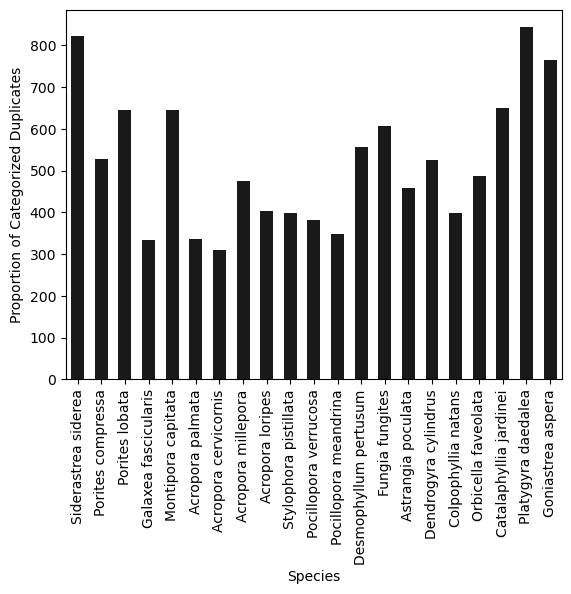

In [104]:
sns.barplot(data = duptypes, x = "Species", y = "Assembly Size (Mb)", 
            color = "black", width = 0.55, alpha = 0.9)
plt.xticks(rotation=90)
plt.ylabel("Proportion of Categorized Duplicates")
plt.savefig("../figures/assembly_size_per_species.pdf", dpi = 300, bbox_inches='tight')

In [1]:
!cat ../table3.csv

In [84]:
duptypes = pd.read_csv("../table3.csv")
duptypes['sum'] = duptypes[["SD", "TD", "PD", "TRD", "DD"]].sum(axis=1, numeric_only=True)
for col in ["SD", "TD", "PD", "TRD", "DD"]:
    duptypes[col] = duptypes[col] / duptypes["sum"]
dups = duptypes[['Species', 'SD', 'TD', 'PD', 'TRD', 'DD']].set_index("Species").stack().reset_index()

/tmp/ipykernel_2166053/2349321223.py:1: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.histplot(dups, x='Species', hue='level_1', weights=0,


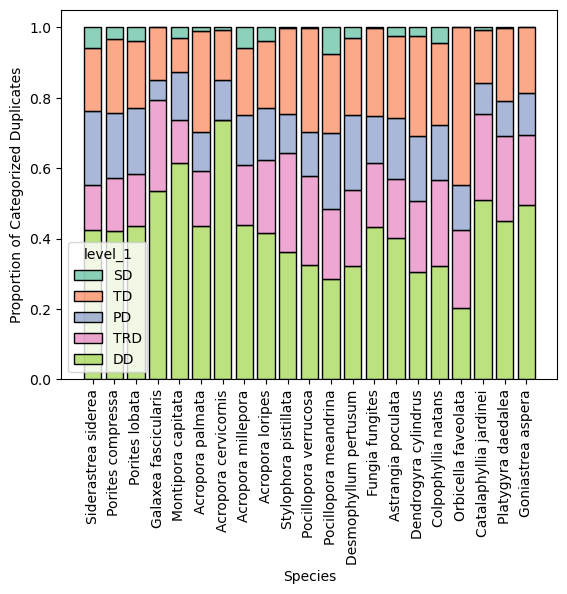

In [85]:
ax = sns.histplot(dups, x='Species', hue='level_1', weights=0,
             multiple='stack', palette=sns.color_palette("Set2"), 
                  shrink=0.8, common_norm = True)
plt.xticks(rotation=90)
plt.ylabel("Proportion of Categorized Duplicates")
plt.savefig("../figures/proportion_repeat_types_per_species.pdf", dpi = 300, bbox_inches='tight')

In [86]:
duptypes = pd.read_csv("../table3.csv")
dups = duptypes[['Species', 'SD', 'TD', 'PD', 'TRD', 'DD']].set_index("Species").stack().reset_index()

/tmp/ipykernel_2166053/3106291263.py:1: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.histplot(dups, x='Species', hue='level_1', weights=0,


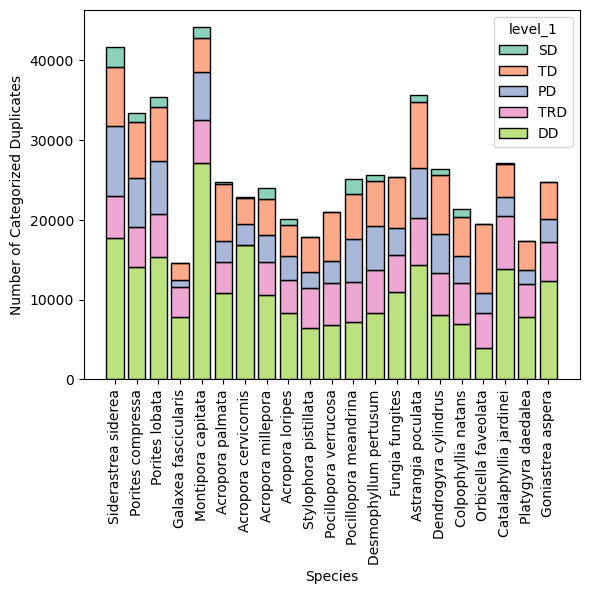

In [87]:
ax = sns.histplot(dups, x='Species', hue='level_1', weights=0,
             multiple='stack', palette=sns.color_palette("Set2"), 
                  shrink=0.8, common_norm = True)
plt.xticks(rotation=90)
plt.ylabel("Number of Categorized Duplicates")
plt.savefig("../figures/count_repeat_types_per_species.pdf", dpi = 300, bbox_inches='tight')